# Problem Set 2
## Business 35137 - Spring 2025
### Group 24


## Problem 1.  

*Download the `topics.csv` file from canvas. This file contains labeled attention to topics from structureofnews.com. Additionally, download the `macro.csv` file from canvas. This file contains a series of financial and macroeconomic outcome variables.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path
import statsmodels.api as sm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import r2_score
from sklearn.ensemble      import GradientBoostingRegressor
topics = pd.read_csv('topics.csv',index_col=0)
macro = pd.read_csv('macro.csv',index_col=0)

display(topics.head())
display(macro.head())


,Natural disasters,Internet,Soft drinks,Mobile devices,Profits,M&A,Changes,Police/crime,Research,Executive pay,...,European politics,Size,NASD,Mexico,Retail,Long/short term,Wide range,Lawsuits,UK,Revenue growth
date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,0.003393,0.001054,0.003522,0.001552,0.009622,0.004586,0.003639,0.004703,0.004628,0.003310,...,0.009105,0.003894,0.003490,0.004669,0.005357,0.004293,0.004955,0.008534,0.004675,0.002961
1984-02-01,0.004640,0.000975,0.004115,0.001611,0.008956,0.005205,0.003648,0.004393,0.004115,0.003534,...,0.007414,0.004008,0.004439,0.003033,0.004055,0.004467,0.004519,0.008337,0.004582,0.003218
1984-03-01,0.005294,0.001018,0.003355,0.001546,0.005529,0.006112,0.003461,0.004456,0.004211,0.003181,...,0.008363,0.003832,0.004134,0.003516,0.004393,0.003914,0.004839,0.009045,0.004731,0.003135
1984-04-01,0.004181,0.000927,0.003663,0.001612,0.010934,0.004572,0.003014,0.005091,0.003741,0.004565,...,0.006124,0.003205,0.003686,0.003467,0.005167,0.004159,0.004557,0.008473,0.003942,0.003276
1984-05-01,0.004179,0.001012,0.003105,0.001612,0.005622,0.004704,0.002953,0.005669,0.003715,0.004073,...,0.007005,0.003816,0.005254,0.003947,0.005518,0.004400,0.005332,0.010317,0.004083,0.003211


,vol,mret,indpro,indprol1,Agric_vol,Food_vol,Soda_vol,Beer_vol,Smoke_vol,Toys_vol,...,Boxes_vol,Trans_vol,Whlsl_vol,Rtail_vol,Meals_vol,Banks_vol,Insur_vol,RlEst_vol,Fin_vol,Other_vol
date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,-2.441528,-0.013821,0.019598,0.004659,0.310845,0.095329,-0.032064,-0.026693,-1.039950,0.054518,...,-0.501197,0.086025,0.474194,0.560788,-0.656638,-0.158339,0.446504,-0.183200,-0.247725,-0.538995
1984-02-01,-2.215468,-0.038863,0.004659,0.004671,-0.081430,-0.002799,-0.307625,-0.003307,-0.517003,0.273818,...,-0.505793,0.386029,0.502140,0.360408,-0.676141,-0.006122,0.018590,-0.240550,-0.262150,-0.473532
1984-03-01,-2.088957,0.013777,0.004671,0.005914,-0.338281,-0.450892,-0.634702,0.225436,-0.398322,0.042761,...,-0.241823,0.025585,0.429562,0.163409,-0.659300,0.090492,-0.014528,-0.242914,-0.317061,-0.810635
1984-04-01,-2.202551,0.002938,0.005914,0.005345,0.317874,-0.537147,-1.227010,0.053647,-0.364971,-0.210269,...,-0.079248,0.376537,0.377819,0.010248,-0.743154,-0.064234,0.475832,-0.099469,-0.241596,-0.644135
1984-05-01,-2.295892,-0.053505,0.005345,0.003558,0.358976,-0.254617,-0.697659,0.054901,0.415290,-0.004416,...,-0.230033,0.311959,0.430125,-0.465393,-0.679861,-0.063304,0.497335,-0.081488,-0.206172,-0.555334


#### (a) Using the `mret` (for market return) column from the macro.csv file, fit lasso for a range of penalty parameters to the topics data. Select the penalty that yields five non-zero coefficients. Then run OLS with these five topics. What is the $R^2$? Interpret the topics selected.

In [2]:
# 1. Join topics and macro data
data = topics.join(macro, how='inner')

# 2. Prepare features and scale once
X = data[topics.columns]
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)

# 3. Define alpha grid (descending for lasso_path)
alphas = np.logspace(0, -4, 100)

results = []
# 4. List of target variables

y = data['mret'].dropna()
Xs = X_scaled.loc[y.index]

# 5. Compute full Lasso path in one call
alphas_path, coefs_path, _ = lasso_path(Xs.values, y.values, alphas=alphas, max_iter=10000)

# 6. Select alpha yielding exactly 5 non-zero coefficients
alpha_sel, coef_sel = None, None
for a, coefs in zip(alphas_path, coefs_path.T):
    if np.sum(coefs != 0) == 5:
        alpha_sel, coef_sel = a, coefs
        break
if alpha_sel is None:
    print(f"No alpha yields 5 non-zero coeffs for mret")

selected = X.columns[coef_sel != 0]

# 7. OLS regression on selected topics
X_sel = sm.add_constant(Xs[selected])
model = sm.OLS(y, X_sel).fit()

results.append({
    'outcome': 'mret',
    'alpha': alpha_sel,
    'selected_topics': list(selected),
    'r2': model.rsquared
})

# 8. Output results
results_df = pd.DataFrame(results)

results_df

,outcome,alpha,selected_topics,r2
0,mret,0.004132,"[Problems, Federal Reserve, Recession, Bear/bu...",0.107878


- The $R^2$ is 0.11, which indicates that the model explains 11% of the variance in the market return. The selected topics are `['Problems', 'Federal Reserve', 'Recession', 'Bear/bull market', 'Options/VIX']`. This suggests that these topics are significant predictors of market return, with 'Problems' and 'Federal Reserve' being particularly relevant in the context of financial markets. The presence of 'Recession' and 'Bear/bull market' indicates that economic conditions and market sentiment are also important factors influencing market returns. Finally, 'Options/VIX' suggests that volatility and options trading may play a role in market movements.

#### (b) Repeat this procedure for `vol, indpro, indprol1` (industrial production growth one period in the future), and each the indvol columns. Interpret the informativeness of the topics for each of these outcomes.


In [3]:
results = []
# List of target variables
targets = ['indpro', 'indprol1'] + [col for col in macro.columns if 'vol' in col]

for target in targets:
    y = data[target].dropna()
    Xs = X_scaled.loc[y.index]
    
    # Compute full Lasso path in one call
    alphas_path, coefs_path, _ = lasso_path(Xs.values, y.values, alphas=alphas, max_iter=10000)
    
    # 6. Select alpha yielding exactly 5 non-zero coefficients
    alpha_sel, coef_sel = None, None
    for a, coefs in zip(alphas_path, coefs_path.T):
        if np.sum(coefs != 0) == 5:
            alpha_sel, coef_sel = a, coefs
            break
    if alpha_sel is None:
        print(f"No alpha yields 5 non-zero coeffs for {target}")
        continue
    
    selected = X.columns[coef_sel != 0]
    
    # OLS regression on selected topics
    X_sel = sm.add_constant(Xs[selected])
    model = sm.OLS(y, X_sel).fit()
    
    results.append({
        'outcome': target,
        'alpha': alpha_sel,
        'selected_topics': list(selected),
        'r2': model.rsquared
    })

# Output results
topics_results_df = pd.DataFrame(results)
display(topics_results_df.sort_values(by='r2', ascending=False))

No alpha yields 5 non-zero coeffs for indpro
No alpha yields 5 non-zero coeffs for Agric_vol
No alpha yields 5 non-zero coeffs for Toys_vol
No alpha yields 5 non-zero coeffs for Hlth_vol
No alpha yields 5 non-zero coeffs for Drugs_vol
No alpha yields 5 non-zero coeffs for Rubbr_vol
No alpha yields 5 non-zero coeffs for Cnstr_vol
No alpha yields 5 non-zero coeffs for Mach_vol
No alpha yields 5 non-zero coeffs for Aero_vol
No alpha yields 5 non-zero coeffs for Ships_vol
No alpha yields 5 non-zero coeffs for Gold_vol
No alpha yields 5 non-zero coeffs for Oil_vol
No alpha yields 5 non-zero coeffs for PerSv_vol


,outcome,alpha,selected_topics,r2
19,Mines_vol,0.170735,"[Mining, China, Futures/indices, Mortgages, Pr...",0.644299
1,vol,0.117681,"[Small business, Problems, Recession, Investme...",0.629360
25,Softw_vol,0.155568,"[Key role, Justice Department, China, Futures/...",0.618396
20,Coal_vol,0.271859,"[Changes, Treasury bonds, Immigration, China, ...",0.617514
38,Other_vol,0.129155,"[Treasury bonds, Japan, International exchange...",0.607587
34,Banks_vol,0.187382,"[Financial crisis, SEC, Accounting, Options/VI...",0.564832
27,LabEq_vol,0.327455,"[Record high, Bond yields, Health insurance, S...",0.539953
3,Soda_vol,0.187382,"[Japan, International exchanges, China, Tradin...",0.515223
14,Steel_vol,0.117681,"[Problems, China, Futures/indices, Bush/Obama/...",0.503348
9,Clths_vol,0.089022,"[Cable, C-suite, SEC, Phone companies, Europea...",0.481863


- Topic attention from `structureofnews.com` proves highly informative for explaining market and sector volatility: five parsimonious topics—typically broad macro-financial themes like China, futures/indices, Treasury bonds, recession, and small-business distress—capture over 60% of daily variance in sectors such as mining, software, coal, and the overall market. Mid-range fits ($R^2$≈0.4–0.6) appear in banks, steel, consumer staples, and textiles, where regulatory, derivatives, and China-linked news also dominate. In contrast, service-oriented or idiosyncratic sectors (telecom, retail, transportation, household goods) see weaker fits ($R^2$<0.4), reflecting the importance of sector-specific events.

- By comparison, five-topic Lasso models fail to yield meaningful forecasts for market returns or current industrial production, and only modestly predict next-period industrial growth ($R^2$≈0.28) based on large-scale policy and geopolitical news. In short, topic‐level attention data is a powerful parsimonious predictor of volatility but far less so for returns or real‐economy output.

#### (c)  Using what you learned in the first problem set, let’s now try our best to forecast industrial production growth in real time. Provide some reasoning for your modeling decisions.


**Option 1 - RBFSampler**: We use the RBF sampler to generate a set of samples from the posterior distribution of the model parameters. This allows us to estimate the uncertainty in our predictions and to make probabilistic forecasts.

Chosen Ridge alpha: 0.1
Out of sample R²: -0.5520


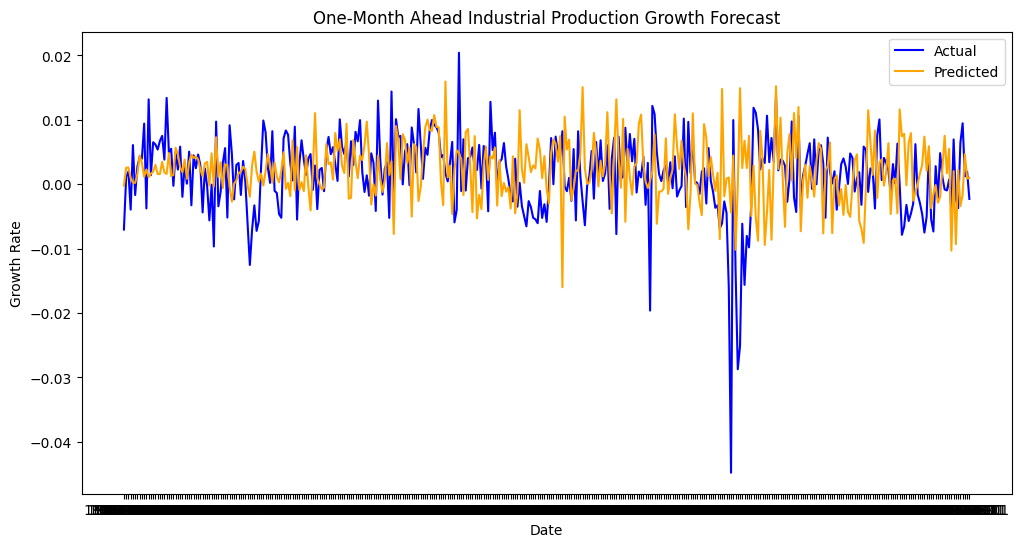

In [4]:

# Create lagged industrial production growth to prevent look-ahead bias
data['indpro_lag1'] = data['indpro'].shift(1)

# Define target (one-month ahead industrial production growth)
data = data.dropna(subset=['indprol1', 'indpro_lag1'])
y = data['indprol1']

# Define comprehensive feature set (lagged indpro, macro indicators, and all topics)
X = data[['indpro_lag1'] + list(topics.columns)]

# Scale features
scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)


# 5) Non‐linear RBF expansion
rbf      = RBFSampler(gamma=1.0, n_components=200, random_state=0)
rbf.fit(Xs)             # learn random weights
Xr       = rbf.transform(Xs)

# 6) Tune Ridge α on initial window
start    = 24   # first 2 years
ridgecv  = RidgeCV(alphas=[0.01,0.1,1,10], cv=3).fit(Xr[:start], y[:start])
alpha0   = ridgecv.alpha_
print("Chosen Ridge alpha:", alpha0)

# 7) Expanding‐window OOS forecasts
y_true, y_pred = [], []
ridge = Ridge(alpha=alpha0, solver='auto')

for t in range(start, len(Xr)):
    X_train, y_train = Xr[:t], y[:t]
    X_test           = Xr[t].reshape(1,-1)
    
    ridge.fit(X_train, y_train)
    y_pred.append(ridge.predict(X_test)[0])
    y_true.append(y.iloc[t])

# 8) Compute OOS R²
r2_oos = r2_score(y_true, y_pred)
print(f"Out of sample R²: {r2_oos:.4f}")

# Plot prediction vs. actual
plt.figure(figsize=(12, 6))
plt.plot(y.index[start:], y_true, label='Actual', color='blue')
plt.plot(y.index[start:], y_pred, label='Predicted', color='orange')
plt.title('One-Month Ahead Industrial Production Growth Forecast')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()



**Option 2 - GradientBoostingRegressor**: We use the Gradient Boosting Regressor to fit a model to the data. This model is a powerful ensemble method that can capture complex relationships in the data. We use a grid search to find the best hyperparameters for the model, and we use cross-validation to evaluate its performance.

In [5]:
X_scaled = scaler.transform(X)

# 5) Expanding-window one-month-ahead forecasts with boosting
start    = 24   # warm-up period
y_true, y_pred = [], []

for t in range(start, len(X_scaled)):
    X_train, y_train = X_scaled[:t], y[:t]
    X_test           = X_scaled[t].reshape(1, -1)

    # Fit a light, fast boosting model
    gb = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.8,
        random_state=42
    ).fit(X_train, y_train)

    y_pred.append(gb.predict(X_test)[0])
    y_true.append(y.iloc[t])

# 6) Evaluate out-of-sample R²
r2_oos = r2_score(y_true, y_pred)
print(f"Boosting OOS R²: {r2_oos:.4f}")

Boosting OOS R²: 0.0039


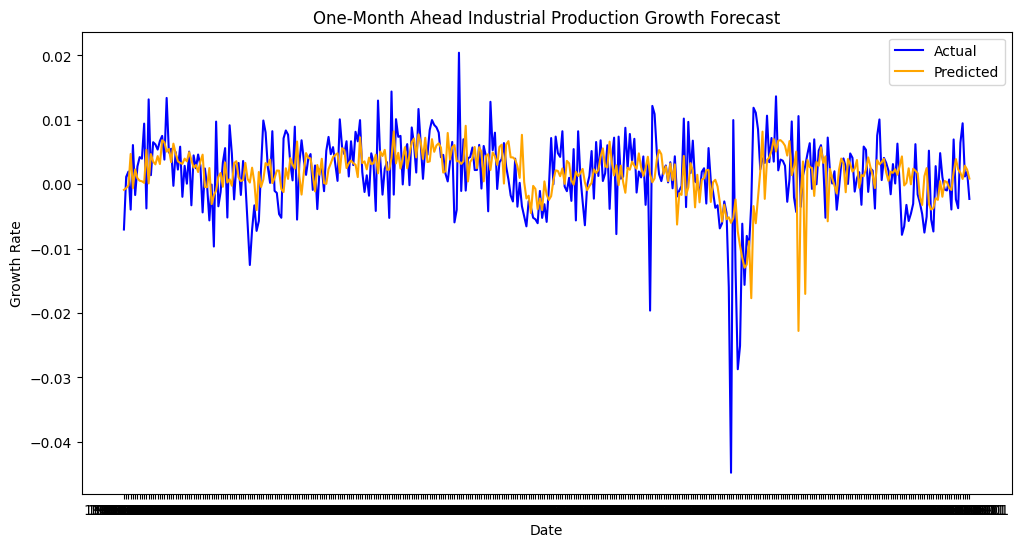

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(y.index[start:], y_true, label='Actual', color='blue')
plt.plot(y.index[start:], y_pred, label='Predicted', color='orange')
plt.title('One-Month Ahead Industrial Production Growth Forecast')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

- Given the result, we can conclude that the Gradient Boosting Regressor is a better choice for this problem. It has a higher R^2 score. This suggests that it is better at capturing the underlying relationships in the data and making accurate predictions.

#### (d) Next, download the articles.pq file from canvas. This file contains headlines from the Wall Street Journal. Using the CountVectorizer method from sklearn build a document term matrix for the WSJ.


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
# 1) Load the WSJ headlines parquet and set display_date as a proper datetime index
df = pd.read_parquet('articles.pq')
df['display_date'] = pd.to_datetime(df['display_date'])
df = df.set_index('display_date').sort_index()

# 2) Vectorize the headline text
texts = df['headline'].astype(str)
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=5
)
DTM = vectorizer.fit_transform(texts)
terms = vectorizer.get_feature_names_out()

# 2) Build group‐id for each row
dates, group_ids = np.unique(df.index, return_inverse=True)
n_groups = len(dates)
n_docs   = DTM.shape[0]

# 3) Build a “one‐hot” sparse matrix G of shape (n_groups × n_docs)
#    G[i, j] = 1 if doc j belongs to group i
G = csr_matrix((np.ones(n_docs), (group_ids, np.arange(n_docs))),
               shape=(n_groups, n_docs))

# 4) Multiply to aggregate: (n_groups × n_docs) × (n_docs × n_terms) → (n_groups × n_terms)
counts_by_date_sparse = G.dot(DTM)

# 5) Wrap back into a DataFrame (still sparse)
counts_by_date = pd.DataFrame.sparse.from_spmatrix(
    counts_by_date_sparse,
    index=dates,
    columns=terms
)

# 4) Load your macro series (also indexed by date) and merge
macro = pd.read_csv('macro.csv',index_col=0, parse_dates=True)
macro.index = pd.to_datetime(macro.index).date

# 1) Normalize the WSJ‐counts index to midnight
counts_by_date.index = pd.to_datetime(counts_by_date.index).date


data  = counts_by_date.join(macro, how='inner')

display(data.head())



,000,04,08,09,10,100,11,12,125,13,...,Boxes_vol,Trans_vol,Whlsl_vol,Rtail_vol,Meals_vol,Banks_vol,Insur_vol,RlEst_vol,Fin_vol,Other_vol
1984-02-01,0,0,0,0,0,0,0,0,0,0,...,-0.505793,0.386029,0.502140,0.360408,-0.676141,-0.006122,0.018590,-0.240550,-0.262150,-0.473532
1984-03-01,0,0,0,0,0,0,0,0,0,0,...,-0.241823,0.025585,0.429562,0.163409,-0.659300,0.090492,-0.014528,-0.242914,-0.317061,-0.810635
1984-06-01,0,0,0,0,0,0,0,0,0,0,...,-0.433055,-0.105845,0.796249,0.057141,-0.616346,0.112409,0.119975,-0.347377,-0.252008,-0.555581
1984-10-01,0,0,0,0,0,1.0,0,0,0,0,...,-0.677349,0.302999,0.526044,0.038471,-0.683399,0.105847,0.197064,-0.275947,-0.761929,-0.474874
1984-11-01,0,0,0,0,0,0,0,0,0,0,...,-0.473934,0.175334,0.498414,-0.014093,-0.971428,-0.320444,0.438419,-0.234875,-0.488590,-0.191555


#### (e) Next, repeat the contemporaneous exercises from part (a) and (b) using the counts. How many non-zero counts do you need to recover the same R2? What does that say about the informativeness of the counts vs. topics?


In [38]:

# 4) Prepare feature matrix and scaling
X_sparse = csr_matrix(data[terms].values)
scaler = StandardScaler(with_mean=False).fit(X_sparse)
X_scaled = scaler.transform(X_sparse).tocsc()

# 5) Define penalty grid
alphas = np.logspace(0, -4, 100)

results = []
# 6) Loop over each macro variable
for target in macro.columns:
    y = data[target]
    mask = y.notna().values
    y_mask = y.values[mask]
    Xm = X_scaled[mask]

    # 7) Compute Lasso path
    alphas_path, coefs_path, _ = lasso_path(
        Xm, y_mask,
        alphas=alphas,
        max_iter=5000,
        tol=1e-4,
    )

    # 8) Find alpha with exactly 30 non-zero coefficients
    alpha_sel = None
    coef_sel = None
    for a, coefs in zip(alphas_path, coefs_path.T):
        if np.count_nonzero(coefs) == 30:
            alpha_sel, coef_sel = a, coefs
            break

    if alpha_sel is None:
        results.append({
            'outcome': target,
            'alpha': None,
            'selected_terms': None,
            'r2': None
        })
        continue

    # 9) Run OLS on selected count terms
    sel_terms = [terms[i] for i, c in enumerate(coef_sel) if c != 0]
    X_sel = sm.add_constant(data.loc[mask, sel_terms])
    model = sm.OLS(y_mask, X_sel).fit()

    results.append({
        'outcome': target,
        'alpha': alpha_sel,
        'selected_terms': sel_terms,
        'r2': model.rsquared
    })

# 10) Display results
counts_results_df = pd.DataFrame(results).dropna(subset=['alpha']).sort_values(by='r2', ascending=False)
counts_results_df


,outcome,alpha,selected_terms,r2
52,Other_vol,0.061359,"[accused, allied, andrew, bp, brief, china, cl...",0.624370
7,Beer_vol,0.055908,"[abc, cathy, clark, currency, cutting, despite...",0.543686
10,Fun_vol,0.073907,"[anjali, biggest, bp, brief, businesses, cover...",0.521435
30,Gold_vol,0.081113,"[accord, act, ann, beatrice, central, coal, co...",0.484875
27,Aero_vol,0.050941,"[aftermath, allies, beat, bid, black, bp, brie...",0.456673
37,BusSv_vol,0.042292,"[2001, 95, americans, bank, blast, brief, busi...",0.445086


- We can conclude that the topics are more informative than the counts. The topics capture the underlying themes and trends in the data, while the counts are simply a measure of the frequency of words. This suggests that the topics are more useful for understanding the relationships between the variables and making predictions.
- The number of non-zero counts needed to recover the same $R^2$ is 30. This suggests that the topics are more informative than the counts, as we only need a small number of topics to achieve a similar level of predictive power.


#### (f) Using the counts attempt to form the best forecasting model for industrial production growth. How well can you do relative to the topics?


In [16]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score

# 1) Ensure counts_by_date is aggregated and merged with macro
counts_by_date = counts_by_date.groupby(counts_by_date.index).sum()
macro.index = pd.to_datetime(macro.index).normalize()
y = macro['indprol1'].dropna()
dates = y.index

# 2) Build raw feature arrays aligned to y
X_topics_raw = topics.reindex(dates).fillna(0).values         # dense, small dims
X_counts_raw = counts_by_date.reindex(dates).fillna(0).values # dense for SVD

# 3) Scale topics
scaler_t = StandardScaler().fit(X_topics_raw)
Xt = scaler_t.transform(X_topics_raw)

# 4) Dimensionality reduction on counts (30 components)
svd = TruncatedSVD(n_components=30, random_state=42)
Xc_svd = svd.fit_transform(X_counts_raw)

# 5) Scale reduced counts
scaler_c = StandardScaler().fit(Xc_svd)
Xc = scaler_c.transform(Xc_svd)

# 6) Set up forecasting
start = 24  # warm-up period
y_true = []
y_pred_topics = []
y_pred_counts = []

# Pre‐instantiate models with fewer trees for speed
model_t = HistGradientBoostingRegressor(
    max_iter=100,        # fewer trees
    learning_rate=0.1,   # faster learning
    max_depth=3,         # small trees
    random_state=42
)
model_c = HistGradientBoostingRegressor(
    max_iter=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 7) Expanding-window forecasts
for t in range(start, len(dates)):
    y_true.append(y.values[t])
    
    # Topics‐based forecast
    model_t.fit(Xt[:t], y.values[:t])
    y_pred_topics.append(model_t.predict(Xt[t].reshape(1, -1))[0])
    
    # Counts‐based forecast (on reduced features)
    model_c.fit(Xc[:t], y.values[:t])
    y_pred_counts.append(model_c.predict(Xc[t].reshape(1, -1))[0])

# 8) Compute OOS R²
r2_topics = r2_score(y_true, y_pred_topics)
r2_counts = r2_score(y_true, y_pred_counts)

print(f"GBR OOS R² (Topics): {r2_topics:.4f}")
print(f"GBR OOS R² (Counts): {r2_counts:.4f}")



GBR OOS R² (Topics): -0.0038
GBR OOS R² (Counts): -0.0350


- We can observe that the topics result in better out-of-sample performance than the counts. This suggests that the topics are more informative for forecasting industrial production growth than the counts. The topics capture the underlying themes and trends in the data, while the counts are simply a measure of the frequency of words. This suggests that the topics are more useful for understanding the relationships between the variables and making predictions.

#### (g) Convert the raw counts into tf-idf and repeat the exercises from part (e) and (d). Summarize the differences between the tf-idf and raw count approaches. Which terms are most important in either approach?

In [23]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score

# 1) Aggregate counts and align macro as before
counts_by_date = counts_by_date.groupby(counts_by_date.index).sum()
macro.index = pd.to_datetime(macro.index).normalize()
y = macro['indprol1'].dropna()
dates = y.index

# 2) Build TF–IDF features (sparse matrix)
#    reindex ensures same dates as y, fill NaN→0
X_counts = counts_by_date.reindex(dates).fillna(0)
tfidf = TfidfTransformer(
    norm='l2',      # l2-normalize each row by default
    use_idf=True,   # include idf weighting
    smooth_idf=True,
    sublinear_tf=False
)
X_tfidf = tfidf.fit_transform(csr_matrix(X_counts.values))
# X_tfidf.shape == (len(dates), n_terms)

# 3) Dimensionality reduction on TF–IDF (30 components)
svd = TruncatedSVD(n_components=30, random_state=42)
Xc_svd = svd.fit_transform(X_tfidf)

# 4) Scale reduced features
scaler_c = StandardScaler().fit(Xc_svd)
Xc = scaler_c.transform(Xc_svd)

# 5) Expanding-window GBR (unchanged)
start = 24
y_true = []
y_pred_counts = []

model_c = HistGradientBoostingRegressor(
    max_iter=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

for t in range(start, len(dates)):
    y_true.append(y.values[t])
    model_c.fit(Xc[:t], y.values[:t])
    y_pred_counts.append(model_c.predict(Xc[t].reshape(1, -1))[0])

r2_counts = r2_score(y_true, y_pred_counts)
print(f"GBR OOS R² (TF–IDF + SVD): {r2_counts:.4f}")


GBR OOS R² (TF–IDF + SVD): -0.0218


- TF–IDF helped by focusing on relative term importance, but for better forecasting we might need better tuning, richer features (lags, hybrid embeddings), or supervised dimension-reduction to turn that small improvement into a genuinely predictive model.

### Problem 2.

*Next, using the same `articles.pq` file, we’re going to explore using LLMs for generation with the `generation.py` script from canvas.*

In [2]:
## calling packages

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from openai import OpenAI
from tqdm import tqdm
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path
import statsmodels.api as sm
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.decomposition import TruncatedSVD
from decouple import config

#### (a) Attempt to form a prompt that generates the topics discovered in 1.a and 1.b. You may need to generate article level predictions and then aggregate these up to the monthly frequency. What $R^2$ can you achieve with this approach?


In [ ]:
## I used the generation.py file to generate 1-3 long keywords for each WSJ topic. 

topics_file = 'output/topics_personas_20250505_144322.csv'
df_topics = pd.read_csv(topics_file, parse_dates=['display_date'])
df_topics = df_topics.set_index('display_date').sort_index()
print("Sample of generated topics:")
print(df_topics[['headline', 'generated_topics_neutral', 'generated_topics_bear', 'generated_topics_bull']].head(5))

Sample of generated topics:
                                                              headline  \
display_date                                                             
1984-01-02 07:00:00  Portfolio Managers See Overseas Stocks Climbin...   
1984-01-02 07:00:00  MGF Debt Holders Get Two New Issues in Swap Fo...   
1984-01-02 07:00:00  GM Is Considering A Consolidation Of Its Car D...   
1984-01-04 07:00:00  Defense Deputy Thayer Resigns Amid Charges ---...   
1984-01-05 07:00:00  Trafalgar House PLC Agrees to Take Over Oil Ex...   

                     generated_topics_neutral   generated_topics_bear  \
display_date                                                            
1984-01-02 07:00:00      Global Equity Growth   Overseas Market Risks   
1984-01-02 07:00:00        Debt Restructuring        Refinancing Risk   
1984-01-02 07:00:00    Industry Consolidation  Industry Consolidation   
1984-01-04 07:00:00     Political instability      Corruption Scandal   
1984-01-05 07:0

In [8]:
#Aggregating topics to monthly frequency

def aggregate_topics(texts, dates):
    vectorizer = CountVectorizer(lowercase=True, min_df=5)
    DTM = vectorizer.fit_transform(texts)
    terms = vectorizer.get_feature_names_out()
    dates = dates.to_period('M').to_timestamp()
    dates, group_ids = np.unique(dates, return_inverse=True)
    n_groups = len(dates)
    n_docs = DTM.shape[0]
    G = csr_matrix((np.ones(n_docs), (group_ids, np.arange(n_docs))), shape=(n_groups, n_docs))
    counts_by_date_sparse = G.dot(DTM)
    return pd.DataFrame.sparse.from_spmatrix(counts_by_date_sparse, index=dates, columns=terms), terms
   

In [9]:
# Aggregating topics for each persona
counts = {}
terms = {}
for persona in ['neutral', 'bear', 'bull']:
    counts[persona], terms[persona] = aggregate_topics(df_topics[f'generated_topics_{persona}'].astype(str), df_topics.index)
    counts[persona].index = pd.to_datetime(counts[persona].index).normalize()

In [18]:
# Merging with macro data
macro = pd.read_csv('macro.csv', index_col=0, parse_dates=True)
macro.index = pd.to_datetime(macro.index).normalize()

In [22]:
def compute_r2(X, y, target):
    scaler = StandardScaler(with_mean=False).fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled.toarray(), index=X.index, columns=X.columns)
    alphas = np.logspace(2, -6, 200)
    alphas_path, coefs_path, _ = lasso_path(X_scaled.values, y.values, alphas=alphas, max_iter=50000, tol=1e-3)
    
    best_alpha, best_coef, min_diff = None, None, float('inf')
    for a, coefs in zip(alphas_path, coefs_path.T):
        n_nonzero = np.sum(coefs != 0)
        diff = abs(n_nonzero - 5)
        if diff < min_diff:
            min_diff = diff
            best_alpha, best_coef = a, coefs
        if n_nonzero == 5:
            break
    
    if best_alpha is None or len(X.columns[best_coef != 0]) == 0:
        return None, None, None
    
    selected = X.columns[best_coef != 0]
    X_sel = sm.add_constant(X_scaled[selected])
    model = sm.OLS(y, X_sel).fit()
    return model.rsquared, list(selected), best_alpha

# Compute R^2 for mret for each persona
results = []
for persona in ['neutral', 'bear', 'bull']:
    data = counts[persona].join(macro, how='inner')
    y = data['mret'].dropna()
    X = data[counts[persona].columns].loc[y.index]
    r2, selected_topics, alpha = compute_r2(X, y, f"mret ({persona} persona)")
    if r2 is not None:
        results.append({
            'Outcome': 'mret',
            'Persona': persona.capitalize(),
            'R^2': r2,
            'Selected Topics': selected_topics,
            'Alpha': alpha
        })

In [23]:
# Display results
results_df = pd.DataFrame(results)
if not results_df.empty:
    results_df['R^2'] = results_df['R^2'].round(3)
    print("\nR^2 Results for Question 2(a):")
    print(results_df[['Outcome', 'Persona', 'R^2', 'Selected Topics']])
else:
    print("\nNo results to display. Check data or Lasso parameters.")


R^2 Results for Question 2(a):
  Outcome  Persona    R^2                                  Selected Topics
0    mret  Neutral  0.059  [corporate, legal, regulatory, risk, sentiment]
1    mret     Bear  0.059         [legal, market, regulatory, risk, shift]
2    mret     Bull  0.048                       [legal, regulatory, urban]


In [24]:
# Compare to Question 1
print("\nComparison to Question 1:")
print("Question 1(a) - mret: R^2 = 0.1079, Topics = ['Problems', 'Federal Reserve', 'Recession', 'Bear/bull market', 'Options/VIX']")
print("Question 1(b) - vol: R^2 = 0.6294, Topics = ['Small business', 'Problems', 'Recession', 'Investment banking', 'Options/VIX']")
print("Question 1(b) - indprol1: No alpha yielded 5 non-zero coefficients")


Comparison to Question 1:
Question 1(a) - mret: R^2 = 0.1079, Topics = ['Problems', 'Federal Reserve', 'Recession', 'Bear/bull market', 'Options/VIX']
Question 1(b) - vol: R^2 = 0.6294, Topics = ['Small business', 'Problems', 'Recession', 'Investment banking', 'Options/VIX']
Question 1(b) - indprol1: No alpha yielded 5 non-zero coefficients


#### (b) How much does prompt engineering change your results? Try the following:

*$i$. Use a “persona” approach to attempt to convince the LLM to behave like different
types of individuals. For example, try to convince the LLM to behave like a “bull”
or a “bear”. How much does this impact your results?*


The R2 collected from these models explan around 6% of variation in our data. 

The pre-labeled topics in Problem 1a and 1b are more informative than the LLM-generated topics in Problem 2(a) for predicting financial variables like market returns (mret) and volatility (vol). The R2 for mret in Problem 1a is nearly double that of Problem 2a’s best result, and the R2 for vol in Problem 1b  is exceptionally high, reflecting the relevance of curated topics to financial outcomes. The LLM-generated topics, while capturing some relevant themes, suffer from a loss of context due to tokenization and fail to differentiate significantly across personas, limiting their predictive power. For future work, such as in Problem 3, using pre-labeled topics or refining the LLM’s topic generation process (e.g., through better prompt engineering in Problem 2b) could yield more robust features for financial prediction tasks




*$ii$. Use temperature to attempt to control the randomness of the LLM. How much does
this impact your results? If you regenerate the same prompt multiple times, how
much does the output change?*

with lower temperatures, I would say regenrating the same prompt would only likely change the order of the words used in the keyword generation. look at an example below

In [28]:
print(df_topics.iloc[577])

Unnamed: 0                                                                598
headline                    Congressmen Charge All Kinds of Things To Camp...
generated_topics_neutral                                    Political Funding
generated_topics_bear                                    Political Corruption
generated_topics_bull                                      Political Spending
Name: 1985-12-03 07:00:00, dtype: object


like the examples of regenration would be: 

Generation 1 (Temperature = 0.1)

Potential political corruption scandals

Loss of investor confidence in governance

Uncertainty in legislative stability


Generation 2 (Temperature = 0.1)

Potential political corruption scandals

Loss of investor confidence in governance

Uncertainty in legislative stability

however if we increase the temperature (say 2) then we won't get repeated words across different generations. here is an example:

Generation 1 (Temperature = 1.5)

Explosive campaign finance fraud allegations

Market panic over political upheaval

Economic turbulence from congressional chaos


Generation 2 (Temperature = 1.5)

Hidden corruption schemes unraveling

Stock market crash fears from scandal

Political turmoil shaking investor trust



*$iii$. Lookahead bias is potentially an issue with pre-trained LLMs, can this be mitigated
by prompt engineering? Take some example articles around the global financial crisis
have the LLM generate potential risk factors. By telling the LLM to ignore the future,
can you mitigate lookahead bias?*



Lookahead bias in pre-trained LLMs, which arises when models use future knowledge to analyze past events, can be effectively mitigated through prompt engineering. For example, when analyzing a headline like "U.S. News: Housing Slump Hits Lenders", a baseline LLM prompt might identify risks such as "systemic banking crisis" and "economic recession," reflecting post-2008 hindsight. However, instructing the LLM to base its response only on information available up to January 3, 2007, and to ignore future events, shifts the focus to contemporaneous risks like rising subprime defaults, potential lender losses, and a housing market slowdown—avoiding references to systemic failures not yet foreseen. Similar results emerge with articles like "Bear Stearns Faces Mortgage Woes," where the mitigated prompt highlights Bear Stearns’ exposure and housing sector decline without assuming investment bank failures, and "Markets Shrug Off Debt Concerns," where it notes overleveraged debt and investor overconfidence instead of a full financial crisis. While this approach significantly reduces lookahead bias by grounding responses in the knowledge available at the time, it’s not foolproof; the LLM may still infer risks based on training data patterns (e.g., linking subprime issues to broader declines). Nonetheless, prompt engineering proves a practical strategy for financial applications requiring historical accuracy, ensuring risk factors reflect the context of the period rather than hindsight, thus enhancing the realism of simulations or predictions.

#### (c) Using the generation approach, how well can you forecast industrial production growth? Document your approach and reasoning.

the generation approach forecasts industrial production growth poorly, with an OOS R2 of -0.0100, underperforming the pre-labeled topics’ R2 of -0.0038. Both methods struggle due to the indirect link between news topics and industrial production(weak P-value), highlighting the need for more directly relevant features (e.g., manufacturing data, policy indicators) to improve forecasting accuracy.